<a href="https://colab.research.google.com/github/vishveshsoni/MNIST--Tensorlfow-2.0---FFNN-CNN-RNN/blob/master/MNIST_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers, optimizers, datasets
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline

Using TensorFlow backend.


In [0]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Num GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

4


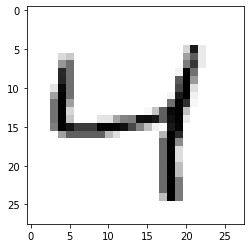

In [0]:
image_index = 2 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
@tf.function
def prepare_mnist_features_and_labels(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)
  return x, y

In [0]:
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds = ds.map(prepare_mnist_features_and_labels)
ds = ds.batch(100)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# ds = ds.map(x_train,y_train)


print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print(y_train[1:3])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
[0 4]


In [0]:
model = keras.Sequential([
    layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10)])

optimizer = optimizers.Adam()

In [0]:
@tf.function
def compute_loss(logits, labels):
  return tf.reduce_mean(
      tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits, labels=labels))

@tf.function
def compute_accuracy(logits, labels):
  predictions = tf.argmax(logits, axis=1)
  return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

@tf.function
def train_one_step(model, optimizer, x, y):

  with tf.GradientTape() as tape:
    logits = model(x)
    loss = compute_loss(logits, y)

  # compute gradient
  grads = tape.gradient(loss, model.trainable_variables)
  # update to weights
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  accuracy = compute_accuracy(logits, y)

  # loss and accuracy is scalar tensor
  return loss, accuracy

In [0]:
def train(epoch, model, optimizer):

  loss = 0.0
  accuracy = 0.0
  for step, (x, y) in enumerate(ds):
    loss, accuracy = train_one_step(model, optimizer, x, y)

    if step % 500 == 0:
      print('epoch', epoch, ': loss', loss.numpy(), '; accuracy', accuracy.numpy())

  return loss, accuracy

In [0]:
for epoch in range(20):
  loss, accuracy = train(epoch, model, optimizer)

print('Final epoch', epoch, ': loss', loss.numpy(), '; accuracy', accuracy.numpy())

epoch 0 : loss 0.057124626 ; accuracy 0.99
epoch 0 : loss 0.052182782 ; accuracy 0.99
epoch 1 : loss 0.04108442 ; accuracy 0.99
epoch 1 : loss 0.037101947 ; accuracy 0.99
epoch 2 : loss 0.04152688 ; accuracy 0.98
epoch 2 : loss 0.023063524 ; accuracy 1.0
epoch 3 : loss 0.05043669 ; accuracy 0.98
epoch 3 : loss 0.028913774 ; accuracy 0.99
epoch 4 : loss 0.056105357 ; accuracy 0.98
epoch 4 : loss 0.020105602 ; accuracy 1.0
epoch 5 : loss 0.057397686 ; accuracy 0.97
epoch 5 : loss 0.02591714 ; accuracy 0.99
epoch 6 : loss 0.018182464 ; accuracy 0.99
epoch 6 : loss 0.0072746365 ; accuracy 1.0
epoch 7 : loss 0.04271 ; accuracy 0.99
epoch 7 : loss 0.0048193014 ; accuracy 1.0
epoch 8 : loss 0.013027665 ; accuracy 1.0
epoch 8 : loss 0.020184314 ; accuracy 0.99
epoch 9 : loss 0.009899261 ; accuracy 1.0
epoch 9 : loss 0.002397667 ; accuracy 1.0
epoch 10 : loss 0.012211399 ; accuracy 1.0
epoch 10 : loss 0.0013849455 ; accuracy 1.0
epoch 11 : loss 0.030913558 ; accuracy 0.99
epoch 11 : loss 0.0510

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1013 - accuracy: 0.9687
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0339 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0140 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0110 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

In [0]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9932


[0.02663768082857132, 0.9932000041007996]

9


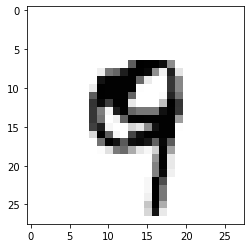

In [0]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [0]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}

def mnist_dataset():
  (x, y), _ = datasets.mnist.load_data()
  ds = tf.data.Dataset.from_tensor_slices((x, y))
  ds = ds.map(prepare_mnist_features_and_labels)
  ds = ds.batch(100)
  return ds

@tf.function
def prepare_mnist_features_and_labels(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)
  return x, y


model = keras.Sequential([
    layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10)])

optimizer = optimizers.Adam()


@tf.function
def compute_loss(logits, labels):
  return tf.reduce_mean(
      tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits, labels=labels))

@tf.function
def compute_accuracy(logits, labels):
  predictions = tf.argmax(logits, axis=1)
  return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

@tf.function
def train_one_step(model, optimizer, x, y):

  with tf.GradientTape() as tape:
    logits = model(x)
    loss = compute_loss(logits, y)

  # compute gradient
  grads = tape.gradient(loss, model.trainable_variables)
  # update to weights
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  accuracy = compute_accuracy(logits, y)

  # loss and accuracy is scalar tensor
  return loss, accuracy


def train(epoch, model, optimizer):

  train_ds = mnist_dataset()
  print(train_ds)
  loss = 0.0
  accuracy = 0.0
  for step, (x, y) in enumerate(train_ds):
    loss, accuracy = train_one_step(model, optimizer, x, y)

    if step % 500 == 0:
      print('epoch', epoch, ': loss', loss.numpy(), '; accuracy', accuracy.numpy())

  return loss, accuracy


for epoch in range(20):
  loss, accuracy = train(epoch, model, optimizer)

print('Final epoch', epoch, ': loss', loss.numpy(), '; accuracy', accuracy.numpy())

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float32, tf.int64)>
epoch 0 : loss 2.3209155 ; accuracy 0.15
epoch 0 : loss 0.14653954 ; accuracy 0.96
<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float32, tf.int64)>
epoch 1 : loss 0.1254768 ; accuracy 0.97
epoch 1 : loss 0.08905347 ; accuracy 0.98
<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float32, tf.int64)>
epoch 2 : loss 0.087266795 ; accuracy 0.97


KeyboardInterrupt: ignored